# Relatório Simulaçao 5

## Modelo SIR em redes

#### Bruno Hideki Amadeu Ogata RA: 140884
#### Camilo Maia Pires RA: 140473
#### Matheus Presotto Limonta RA: 140740
#### Victor Hugo Godoi Pedrota RA: 140698 

In [186]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
from collections import OrderedDict

## Modelo SIR em redes

   A simulação terá 13 regiões diferentes e as conexões entre elas será definida como parâmetros na simulação. Para cada região teremos uma população de suscetiveis, infectados e recuperados da sua respectiva região, também para cada população será definidio as taxas de contágio e de recuperação que pode mudar dependendo dos recursos, situação econôminca, social e estrutura de cada região.


<img width="300px" src="img/img.jpg">


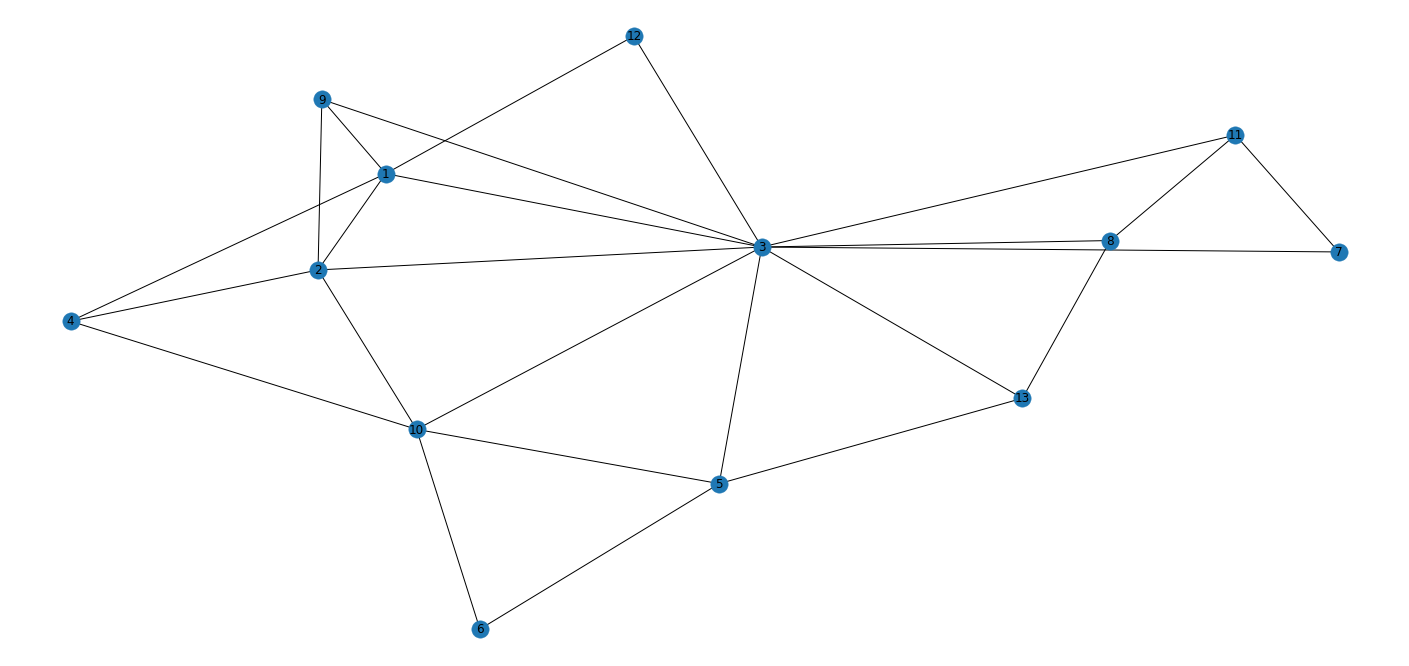

In [217]:
###a conexao será definida de acordo com as fronteiras geográficas 

'''
Argentina - node 1
Bolívia - node 2
Brasil - node 3
Chile - node 4
Colômbia - node 5
Equador - node 6
Guiana francesa - node 7
Guiana - node 8
Paraguai - node 9
Peru - node 10
Suriname - node 11
Uruguai - node 12
Venezuela - node 13
'''

#matriz com as constantes de migração
#posição ij indica a taxa de migração de pessoas de uma região i+1 para um região j+1
taxa = np.zeros((13,13), dtype=np.float64)
G = nx.Graph()

    
#com que paises a argentina faz fronteiras

taxa[0][3] = 0.001
taxa[0][11] = 0.008
taxa[0][2] = 0.003
taxa[0][8] = 0.007
taxa[0][1] = 0.008


#com que paises a bolivia faz fronteiras

taxa[1][0] = 0.001
taxa[1][2] = 0.005
taxa[1][3] = 0.006
taxa[1][8] = 0.003
taxa[1][8] = 0.004
taxa[1][9] = 0.005

#com que paises o brasil faz fronteiras

taxa[2][0] =  0.001
taxa[2][11] =  0.009
taxa[2][8] =  0.008
taxa[2][1] =  0.007
taxa[2][9] = 0.005
taxa[2][4] =  0.003
taxa[2][12] =  0.003
taxa[2][7] = 0.001
taxa[2][6] =  0.001
taxa[2][10] =  0.001

#com que paises o chile faz fronteiras

taxa[3][0] =  0.001
taxa[3][9] =  0.006
taxa[3][1] =  0.009

#com que paises o colombia faz fronteiras

taxa[4][2] =  0.003
taxa[4][9] =  0.005
taxa[4][5] =  0.007
taxa[4][12] =  0.008

#com que paises o equador faz fronteiras

taxa[5][4] =  0.006
taxa[5][9] =  0.004

#com que paises o guiana francesa faz fronteiras

taxa[6][2] =  0.001
taxa[6][10] =  0.001

#com que paises o guiana faz fronteiras

taxa[7][10] =  0.001
taxa[7][2] =  0.001
taxa[7][12] =  0.001

#com que paises o paraguai faz fronteiras

taxa[8][2] =  0.001
taxa[8][0] =  0.003
taxa[8][1] =  0.002

#com que paises o peru faz fronteiras

taxa[9][4] =  0.006
taxa[9][5] =  0.007
taxa[9][1] =  0.008
taxa[9][2] =  0.004
taxa[9][3] =  0.001

#com que paises o suriname faz fronteiras

taxa[10][6] =  0.001
taxa[10][7] =  0.004
taxa[10][2] =  0.006

#com que paises o uruguai faz fronteiras

taxa[11][0] =  0.001
taxa[11][2] =  0.001


#com que paises o venezuela faz fronteiras

taxa[12][2] =  0.001
taxa[12][4] =  0.002
taxa[12][7] =  0.005

paises = 14

for i in range(1, paises):
    for j in range(1, paises):
        if taxa[i-1][j-1] != 0:
            G.add_edge(i,j)



G.nodes[1]['nome'] = 'argentina'
G.nodes[2]['nome'] = 'bolivia'
G.nodes[3]['nome'] = 'brasil'
G.nodes[4]['nome'] = 'chile'
G.nodes[5]['nome'] = 'colombia'
G.nodes[6]['nome'] = 'equador'
G.nodes[7]['nome'] = 'guiana francesa'
G.nodes[8]['nome'] = 'guiana'
G.nodes[9]['nome'] = 'paraguai'
G.nodes[10]['nome'] = 'peru'
G.nodes[11]['nome'] = 'suriname'
G.nodes[12]['nome'] = 'uruguai'
G.nodes[13]['nome'] = 'venezuela'

fig, axis = plt.subplots(figsize=(25,12))
nx.draw(G, with_labels=True)
plt.show()
#plot do grafo representando as conexões com cada país

# Simulação

In [218]:
#definindo as condições iniciais padrão da população de cada país
G.nodes[1]['N'] = 45195


G.nodes[2]['N'] = 11673


G.nodes[3]['N'] = 212559


G.nodes[4]['N'] = 19116


G.nodes[5]['N'] = 50882

G.nodes[6]['N'] = 17643


G.nodes[7]['N'] = 290


G.nodes[8]['N'] = 786


G.nodes[9]['N'] = 7132


G.nodes[10]['N'] = 33050


G.nodes[11]['N'] = 588


G.nodes[12]['N'] = 3473


G.nodes[13]['N'] = 28435

#(pais, infectados, taxa r, taxa a, população recuperados)
paises = [
    (3,4,0.7,0.1,0),
    (1,4,0.7,0.1,0),    
]

def simulacao(deterministico = 1, r = 0.65, a = 0.1, g1 = 1, g2 = 0, g3 = 0, g4 = 0, t = 100, step = 0.1, t2 = 0, a2 = 0, liga = 0):
    
    
    for i in list(G.nodes):
        G.nodes[i]['I'] =  0
        G.nodes[i]['i_array'] = [0]
        G.nodes[i]['r'] = r
        G.nodes[i]['a'] = a
        G.nodes[i]['R'] = 0
        G.nodes[i]['r_array'] = [0]
        G.nodes[i]['S'] = G.nodes[i]['N'] - G.nodes[i]['I']
        G.nodes[i]['s_array'] = [G.nodes[i]['N'] - G.nodes[i]['I']]
        
        
    for val in paises:
        G.nodes[val[0]]['I'] =  val[1]
        G.nodes[val[0]]['i_array'] = [val[1]]
        G.nodes[val[0]]['r'] = val[2]
        G.nodes[val[0]]['a'] = val[3]
        G.nodes[val[0]]['R'] = val[4]
        G.nodes[val[0]]['r_array'] = [val[4]]
        G.nodes[val[0]]['S'] = G.nodes[i]['N'] - G.nodes[i]['I']
        G.nodes[val[0]]['s_array'] = [G.nodes[i]['N'] - G.nodes[i]['I']]


    for t in np.arange(0,t,step):
        
         
        for n in list(G.nodes):
           
            if(t2 == t and liga == 1):
                G.nodes[n]['a'] = a2     
                
            infectados = G.nodes[n]['I']

            for viz in list(G.neighbors(n)):
                if(deterministico == 1):
                    infectados += G.nodes[viz]['I'] *  taxa[viz-1][n-1]
                    infectados -= G.nodes[n]['I'] * taxa[n-1][viz-1]
                else:
                    aux = np.random.random_sample()/100
                    infectados += G.nodes[viz]['I'] * np.random.random_sample()/100
                    infectados -= G.nodes[n]['I'] * np.random.random_sample()/100


            dSdt = (-G.nodes[n]['r']  * (G.nodes[n]['S'] * infectados) / G.nodes[n]['N'] ) * step
            dIdt = (((G.nodes[n]['r'] * (G.nodes[n]['S'] * infectados)) / G.nodes[n]['N']) - G.nodes[n]['a'] * infectados ) * step
            dRdt = (G.nodes[n]['a'] * infectados) * step



            G.nodes[n]['S'] += dSdt
            G.nodes[n]['I'] += dIdt
            G.nodes[n]['R'] += dRdt

            G.nodes[n]['s_array'].append(G.nodes[n]['S'])
            G.nodes[n]['i_array'].append(G.nodes[n]['I'])
            G.nodes[n]['r_array'].append(G.nodes[n]['R'])
    
    if g1 == 1:
        plt.style.use('ggplot') 
        fig = plt.figure(figsize=(20,8))
        for n in list(G.nodes):
            plt.plot(G.nodes[n]['i_array'],  label = G.nodes[n]['nome'])
        plt.title('População infectada')
        plt.legend()
        plt.show()
    if g2 == 1:
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(20,8))
        for n in list(G.nodes):
            plt.plot(G.nodes[n]['s_array'],  label = G.nodes[n]['nome'])
        plt.title('População suscetível à infecção')
        plt.legend()
        plt.show()
    if g3 == 1:
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(20,8))
        for n in list(G.nodes):
            plt.plot(G.nodes[n]['r_array'],  label = G.nodes[n]['nome'])
        plt.title('População recuperada')
        plt.legend()
        plt.show()
        
    if g4 == 1:
        plt.style.use('ggplot')
        fig = plt.figure(figsize=(20,8))
        for n in list(G.nodes):
            soma = []
            for j in range(100):
                soma.append(G.nodes[n]['i_array'][j] + G.nodes[n]['s_array'][j] + G.nodes[n]['r_array'][j])
        plt.plot(soma)
        #plt.title('População do sistema')
        plt.show()
        

### 1. Modelo matemático




        As seguintes equações descrevem o modelo matemático para essa simulação que utiliza o modelo SIR:
$$
    \frac{dS}{dt} = -rSI;
$$

$$
    \frac{dI}{dt} = rSI - aI -\mu I + \sum\limits_{v = 0}^{13} \alpha_v I_v;
$$

$$
    \frac{dR}{dt} = aI;
$$

### 2. Parâmetros de simulação
\
$N$: Numero total da população
\
\
$S$: Quantidade de indivíduos suscetíveis a infecção da doença
\
\
$I$: Numero de infectados
\
\
$R$: Numero de recuperados
\
\
$t$: Tempo da simulação
\
\
$r$: taxa de contágio
\
\
$a$: taxa de recuperação
\
\
$\mu$: taxa de emigração(saída do país)
\
\
$\alpha_v$: taxa de imigração(entrada no país)
\
\
$I_v$: Quantidade de infectados nos países vizinhos
\
\
$Deterministico$: Se for igual a 1 a simulação será deterministica, se igual a 0, será estocástica



### 3. Simulações, gráficos e discussão
#### 3.1
#### Parâmetros padrão:
$Deterministico$ = 1
\
$N$ = Cada país terá sua população equivalente à população real em proporção de milhares (população do país / 1000)
\
$I$ = 1 na Venezuela e no Equador e $I$ = 0 no restante
\
$R$ = 0
\
$t$ = 150
\
$r$ = 0.65 para todos os países
\
$a$ = 0.1 para todos os países
\
$\mu$ e $\alpha_v$ valores pré definidos

Nesta primeira simulação temos os parâmetros padrão, onde a infecção da doença começa na Venezuela e no Equador, como a taxa de infecção é alta, e a versão do modelo SIR é a determinística, sempre que um país tem fronteira com Venezuela e Equador, acabará contraindo a doença também, como a colômbia é um país que faz fronteira com ambos, observa-se no primeiro gráfico que aumentará seus casos mais rapidamente que os outros países, além disso como a taxa de cura é baixa, todos os países terão sua população inteira infectada, como vemos no segundo gráfico onde toda população suscetível à infecção cai para 0 eventualmente.

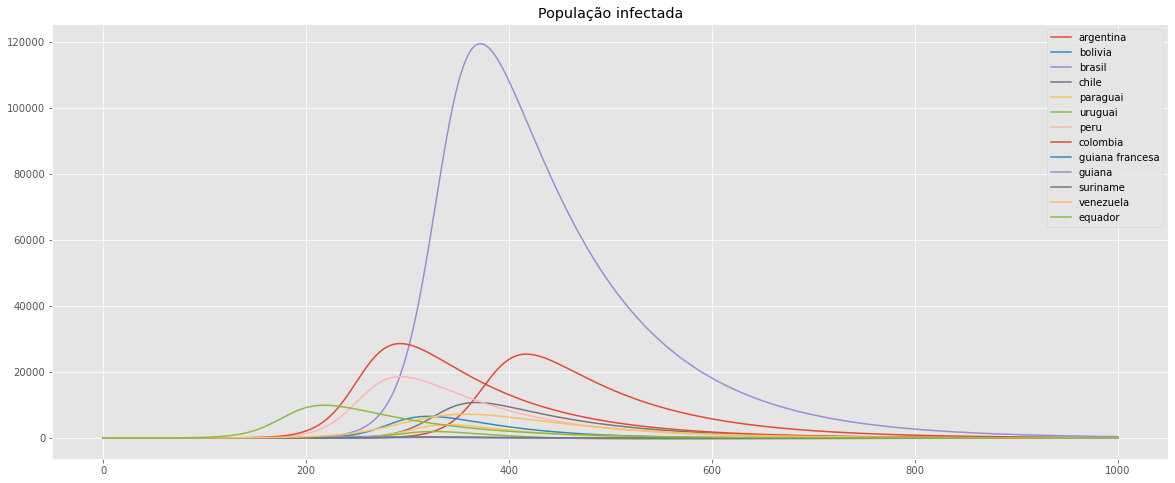

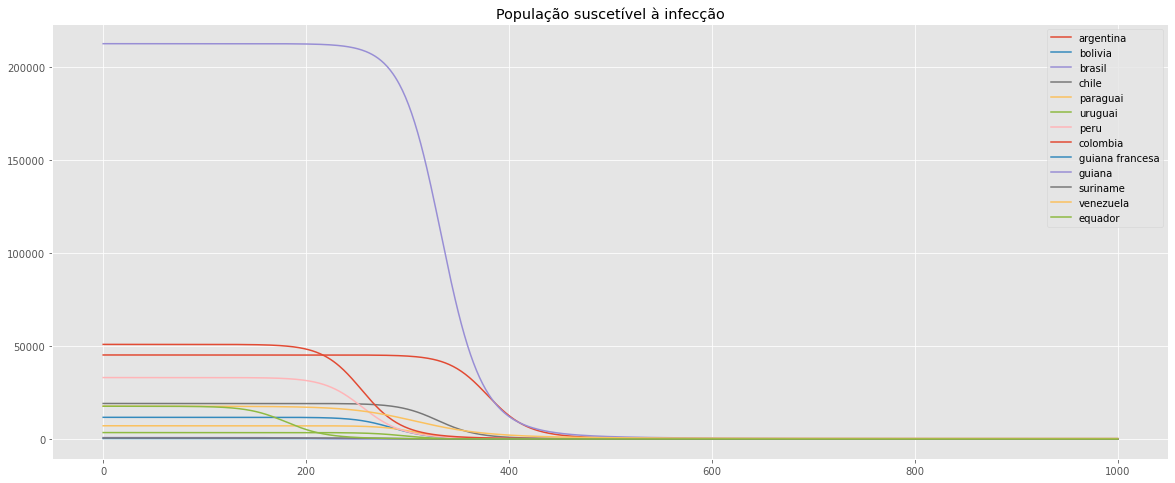

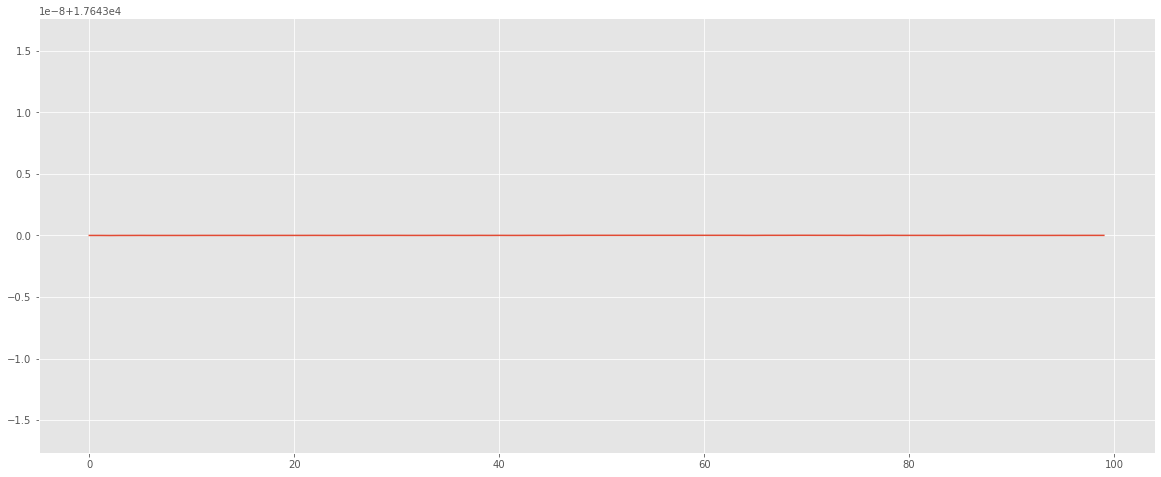

In [219]:
#(pais, infectados, taxa r, taxa a, população recuperados)
paises = [
    (6,1,0.65,0.1,0),
    (13,1,0.65,0.1,0),
]
simulacao(g3=0, g2= 1, g4 =1)

#### 3.2

$\alpha_v$ = 0

Nesta simulação, nós zeramos a taxa de imigração da colômbia, o que representa a fechada das fronteiras do país, na simulação 3.1 víamos que a Colômbia era o país que se infectava mais rapidamente(fora os países que iniciaram com contaminação), agora com a fechada das fronteiras vemos pelo grafico 2 que a população se mantém intacta durante pandemia.

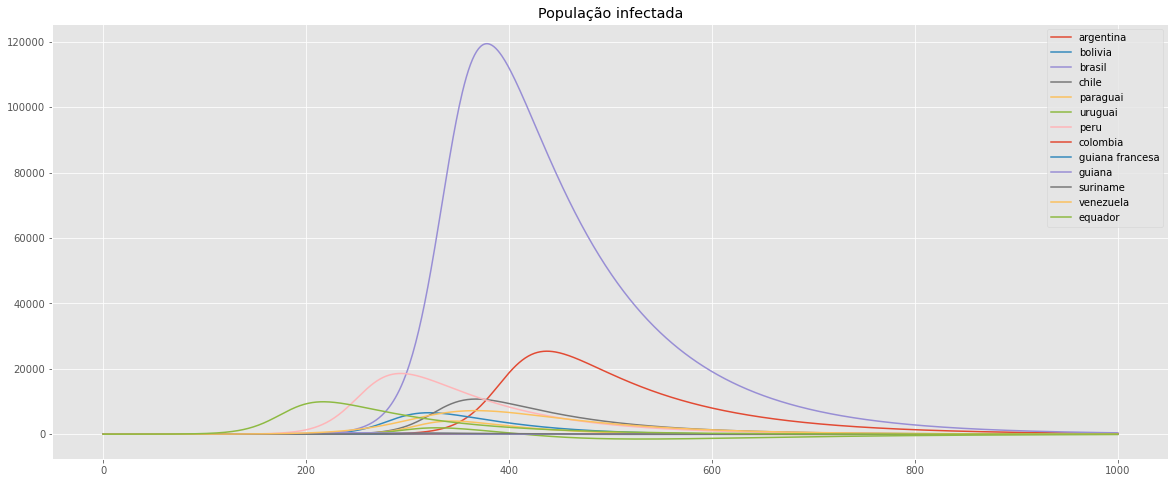

In [190]:
taxa[2][4] = 0
taxa[5][4] = 0
taxa[12][4] = 0
taxa[9][4] = 0

simulacao()

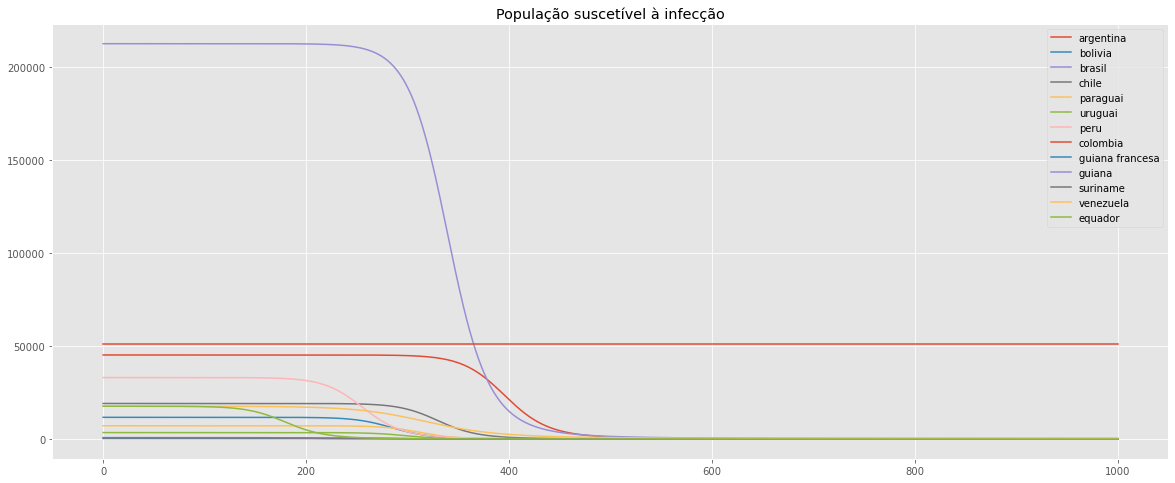

In [191]:
simulacao(g1 = 0, g2 =1)

In [214]:
taxa[2][4] = 0.09
taxa[5][4] = 0.03
taxa[12][4] = 0.08
taxa[9][4] = 0.002


#### 3.3
#### Parâmetros:

$t$ = 150
\
$r$ = 0.65 para todos os países
\
$a$ = 0.1 para todos os países
\
$\mu$ e $\alpha_v$ valores arbitrários de acordo com a função random()

Nesta, simulação os valores das taxas de migração são aleatórios e determinados por uma função random()

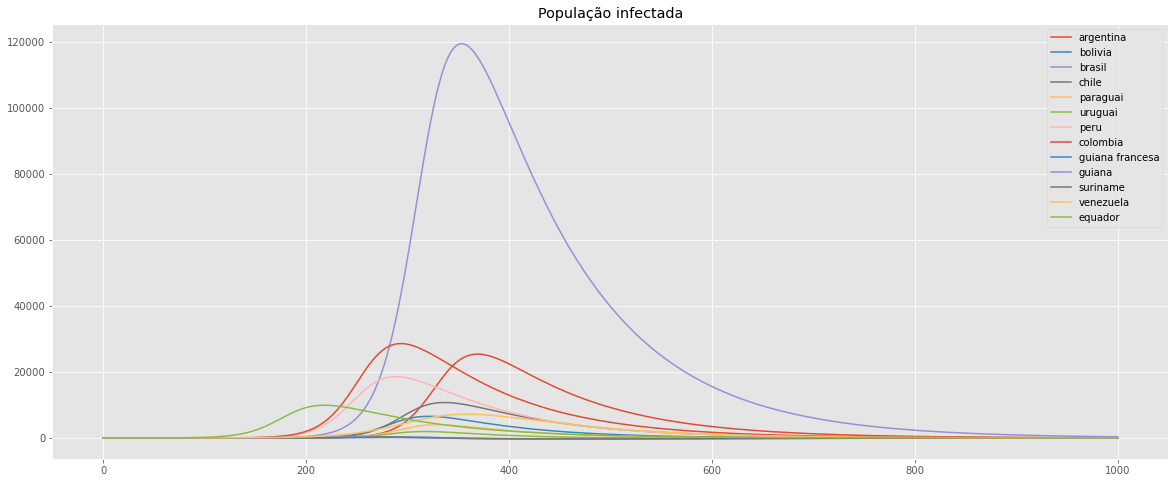

In [215]:
simulacao(deterministico = 0 , g1 = 1)

#### 3.4
#### Parâmetros:

$t$ = 100
\
$r$ = 0.65 para todos os países
\
$a$ = 0 para todos os países
\
$t_2$ = 50
\
$a_2$ = 0.1
\
$\mu$ e $\alpha_v$ valores pré determinados

Nesta simulação temos que a cura é descoberta após um tempo $t_2$, então nenhuma pessoa se cura antes desse tempo determinado, fazendo com que a disseminação ocorra entre todos os países e depois quando ocorre a cura a população de infectados começa a diminuir.

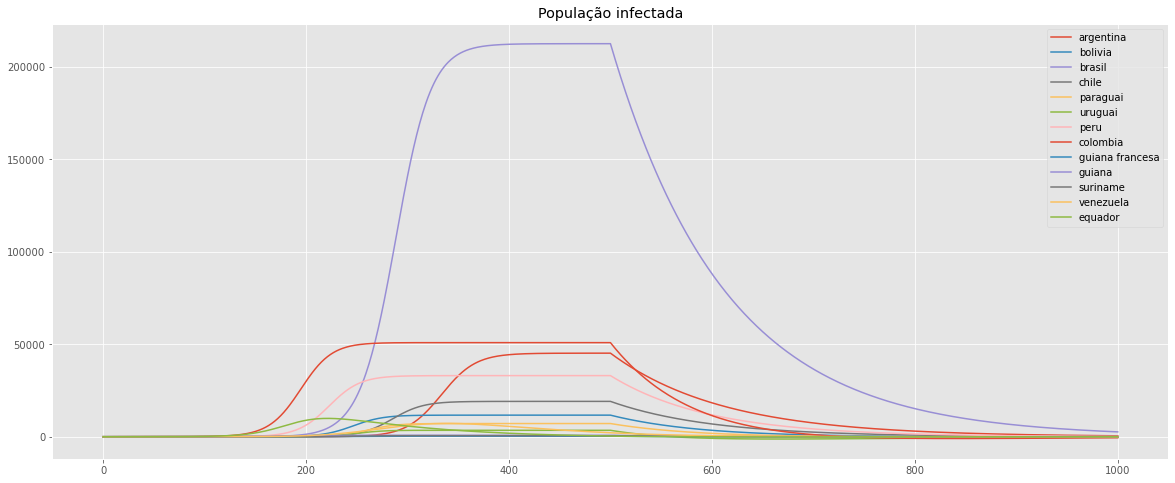

In [213]:
simulacao(deterministico = 1 ,g1 = 1, liga =1, t2 = 50, a =0, a2 = 0.1)

#### 3.5
#### Parâmetros:

$t$ = 100
\
$r$ = 0.000001 para todos os países menos venezuela
\
$a$ = 0.9 para todos os países menos venezuela
\
$\mu$ e $\alpha_v$ valores pré determinados

Nesta simução, a taxa de infecção é alta para a venezuela e muito baixa para os outros países. Assim no território venezuelano a doeça se espalha rapidamente. Porém, mesmo com as migrações, quando um país tem um indivíduo infectado ele se cura rapidamente e sem passar para o próximo.  


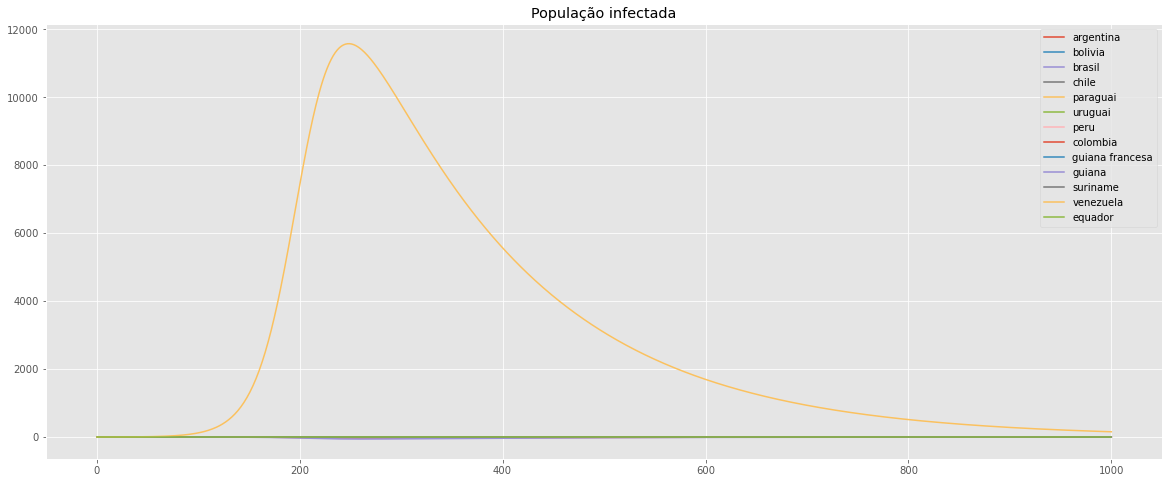

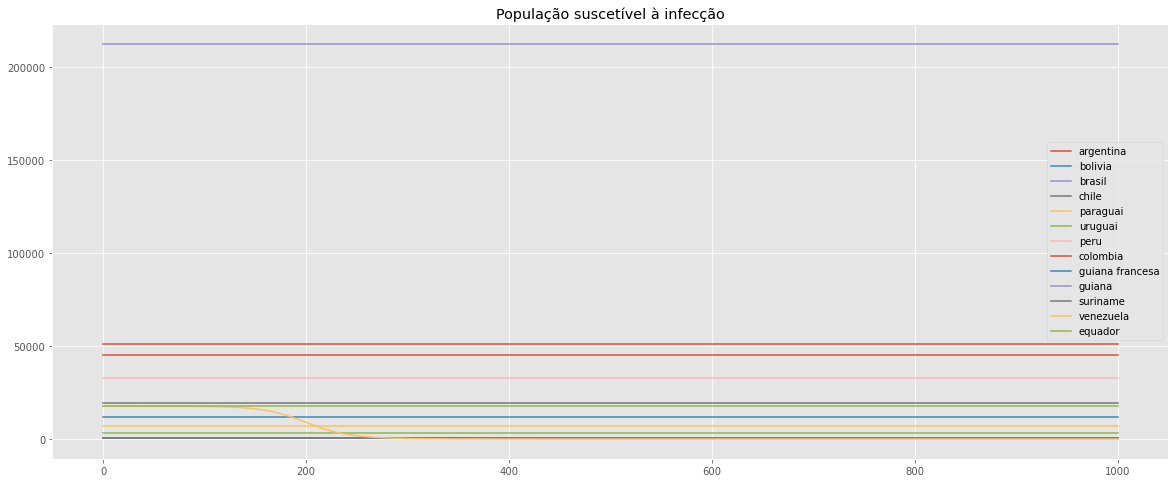

In [225]:
#(pais, infectados, taxa r, taxa a, população recuperados)
paises = [
    (13,1,0.9,0.06,0)
]
simulacao(g1 = 1, g2 =1, a = 0.9, r = 0.000001)

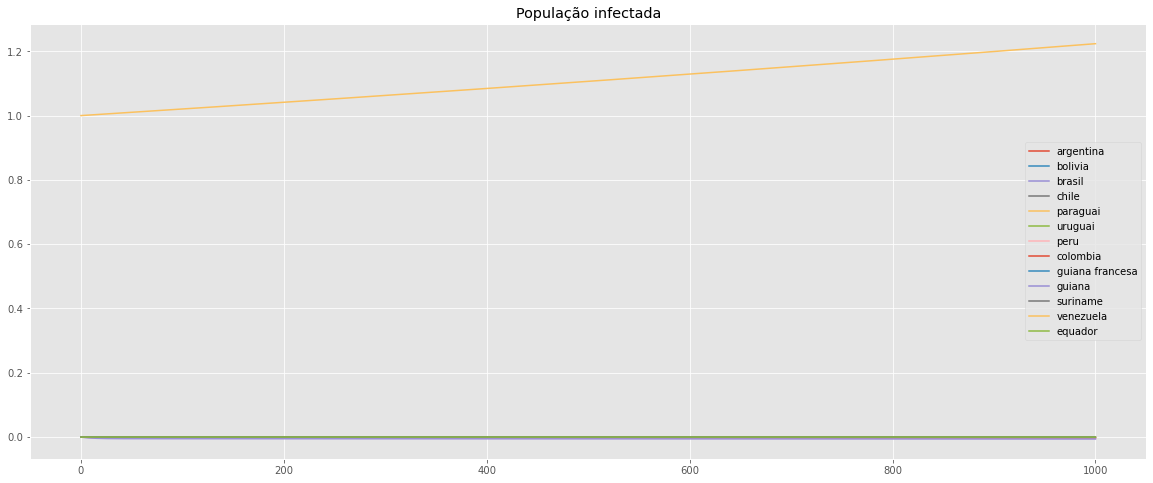

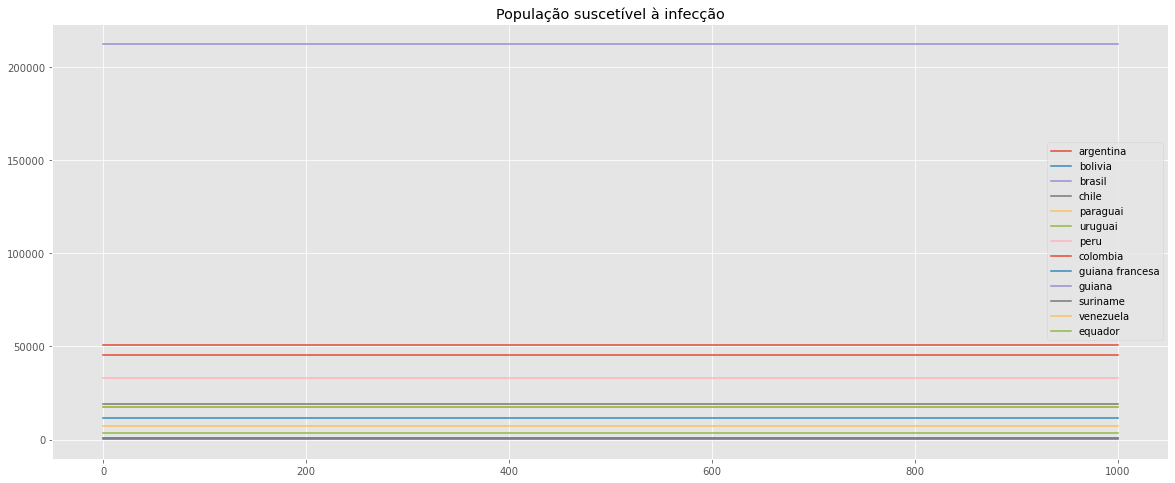

In [229]:
#(pais, infectados, taxa r, taxa a, população recuperados)
paises = [
    (13,1,0.1,0.06,0),
]
simulacao(g1 = 1, g2 =1, a = 0.9, r = 0.000001)